<a href="https://colab.research.google.com/github/Sai-Pranav2503/AIML_Project/blob/main/SmokingDrinkingPrediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Smoking and Drinking Dataset with body signal

This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded. The purpose of this dataset is to identify and classify a smoker or drinker.

Details of the dataset:

- Sex: Male, Female
- Age: Round up to 5 years
- Height: Round up to 5 cm [cm]
- Weight: [kg]
- Sight_left: Eyesight (left)
- Sight_right: Eyesight (right)
- Hear_left: Hearing left, 1(normal), 2(abnormal)
- Hear_right: Hearing right, 1(normal), 2(abnormal)
- SBP: Systolic blood pressure [mmHg]
- DBP: Diastolic blood pressure [mmHg]
- BLDS: BLDS or FSG (fasting blood glucose) [mg/dL]
- Tot_chole: Total cholesterol [mg/dL]
- HDL_chole: HDL cholesterol [mg/dL]
- LDL_chole: LDL cholesterol [mg/dL]
- Triglyceride: Triglyceride [mg/dL]
- Hemoglobin: Hemoglobin [g/dL]
- Urine_protein: Protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- Serum_creatinine: Serum (blood) creatinine [mg/dL]
- SGOT_AST: SGOT (Glutamate-oxaloacetate transaminase) AST (Aspartate transaminase) [IU/L]
- SGOT_ALT: ALT (Alanine transaminase) [IU/L]
- Gamma_GTP: y-glutamyl transpeptidase [IU/L]
- SMK_stat_type_cd: Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
- DRK_YN: Drinker or Not

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


import catboost as cb
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.svm import SVC ,SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import os
import pickle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("./smoking_driking_dataset_Ver01.csv")

In [ ]:
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123342 entries, 0 to 123341
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               123342 non-null  object 
 1   age               123342 non-null  int64  
 2   height            123342 non-null  int64  
 3   weight            123342 non-null  int64  
 4   waistline         123342 non-null  float64
 5   sight_left        123342 non-null  float64
 6   sight_right       123342 non-null  float64
 7   hear_left         123342 non-null  float64
 8   hear_right        123342 non-null  float64
 9   SBP               123342 non-null  float64
 10  DBP               123341 non-null  float64
 11  BLDS              123341 non-null  float64
 12  tot_chole         123341 non-null  float64
 13  HDL_chole         123341 non-null  float64
 14  LDL_chole         123341 non-null  float64
 15  triglyceride      123341 non-null  float64
 16  hemoglobin        12

In [ ]:
df.shape, df.isna().sum() # Viewing the dataset shape and missing data details

((123342, 24),
 sex                 0
 age                 0
 height              0
 weight              0
 waistline           0
 sight_left          0
 sight_right         0
 hear_left           0
 hear_right          0
 SBP                 0
 DBP                 1
 BLDS                1
 tot_chole           1
 HDL_chole           1
 LDL_chole           1
 triglyceride        1
 hemoglobin          1
 urine_protein       1
 serum_creatinine    1
 SGOT_AST            1
 SGOT_ALT            1
 gamma_GTP           1
 SMK_stat_type_cd    1
 DRK_YN              1
 dtype: int64)

In [ ]:
df.nunique() # The number of unique values in each column

sex                   2
age                  14
height               13
weight               23
waistline           617
sight_left           21
sight_right          21
hear_left             2
hear_right            2
SBP                 140
DBP                 103
BLDS                346
tot_chole           328
HDL_chole           149
LDL_chole           299
triglyceride        983
hemoglobin          147
urine_protein         6
serum_creatinine     94
SGOT_AST            274
SGOT_ALT            321
gamma_GTP           624
SMK_stat_type_cd      3
DRK_YN                2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,123342.0,47.607952,14.172230,20.0,35.0,45.0,60.0,85.0
height,123342.0,162.283529,9.273676,130.0,155.0,160.0,170.0,190.0
weight,123342.0,63.313997,12.531816,25.0,55.0,60.0,70.0,140.0
waistline,123342.0,81.272164,12.119393,35.0,74.2,81.0,88.0,999.0
sight_left,123342.0,0.981681,0.609877,0.1,0.7,1.0,1.2,9.9
sight_right,123342.0,0.982435,0.624455,0.1,0.7,1.0,1.2,9.9
hear_left,123342.0,1.031246,0.173984,1.0,1.0,1.0,1.0,2.0
hear_right,123342.0,1.030460,0.171850,1.0,1.0,1.0,1.0,2.0
SBP,123342.0,122.425054,14.497874,75.0,112.0,120.0,131.0,232.0
DBP,123341.0,76.057921,9.894775,36.0,70.0,76.0,82.0,160.0


In [ ]:
df[df.duplicated].shape # Checking data for duplicates

(0, 24)

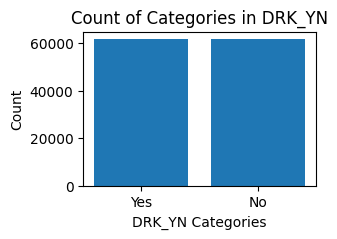

In [ ]:
# Count the occurrences of each category in the 'DRK_YN' column
counts = df['DRK_YN'].value_counts()

# Set up the figure size (optional, adjust as needed)
plt.figure(figsize=(3, 2))

# Create a bar plot of the counts
plt.bar(counts.index, counts.values)

# Set x-axis label
plt.xlabel("DRK_YN Categories")

# Specify tick positions and labels on the x-axis
plt.xticks(counts.index, ["Yes", "No"])

# Set y-axis label
plt.ylabel("Count")

# Set the title of the plot
plt.title("Count of Categories in DRK_YN")

# Display the plot
plt.show()

In [ ]:
# Function to remove outliers in a specified column
def remove_outliers(df, column, lower_quantile=0.1, upper_quantile=0.9):
    # Calculate the first quartile (Q1), third quartile (Q3), and Interquartile Range (IQR)
    Q1 = df[column].quantile(lower_quantile)
    Q3 = df[column].quantile(upper_quantile)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to keep only values within the specified bounds
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_out

# Function to print the percentage of null values in each column
def print_null_percent(df):
    # Calculate the percentage of null values for each column
    null_perc = df.isna().sum() / len(df)

    # Format the percentages and return the result
    return null_perc.apply(lambda x: f"{x:.1%}")

# Columns to exclude from outlier removal
cols_to_exclude = ["sex", "DRK_YN", "urine_protein", "hear_left", "hear_right"]

# Iterate over columns and remove outliers for those not in the exclusion list
for column in df.columns:
    if column not in cols_to_exclude:
        df = remove_outliers(df, column)

# Print the percentage of null values after outlier removal
print_null_percent(df)

# remove_outliers Function: Defines a function to remove outliers from a specified column using the IQR method.
# print_null_percent Function: Defines a function to print the percentage of null values in each column.
# cols_to_exclude: List of columns to exclude from outlier removal.
# Iterate and Remove Outliers: Iterates over columns in the DataFrame and removes outliers for columns not in the exclusion list.
# Print Null Percent After Outlier Removal: Prints the percentage of null values in each column after the outlier removal process.

sex                 0.0%
age                 0.0%
height              0.0%
weight              0.0%
waistline           0.0%
sight_left          0.0%
sight_right         0.0%
hear_left           0.0%
hear_right          0.0%
SBP                 0.0%
DBP                 0.0%
BLDS                0.0%
tot_chole           0.0%
HDL_chole           0.0%
LDL_chole           0.0%
triglyceride        0.0%
hemoglobin          0.0%
urine_protein       0.0%
serum_creatinine    0.0%
SGOT_AST            0.0%
SGOT_ALT            0.0%
gamma_GTP           0.0%
SMK_stat_type_cd    0.0%
DRK_YN              0.0%
dtype: object

In [ ]:
#Removing duplicates
df = df[df["LDL_chole"] != 1]
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [ ]:
# Convert 'DRK_YN' column values to numerical format: 1 for 'Y' and 0 for 'N'
df['DRK_YN'] = [1 if i == "Y" else 0 for i in df['DRK_YN']]

# Convert 'sex' column values to numerical format: 1 for 'Male' and 0 for 'Female'
df['sex'] = [1 if i == "Male" else 0 for i in df['sex']]

# Create x_data by dropping the 'DRK_YN' column from the DataFrame
x_data = df.drop(["DRK_YN"], axis=1)

# Convert 'DRK_YN' Values: Change the values in the 'DRK_YN' column to numerical format, where 1 represents 'Y' and 0 represents 'N'.
# Convert 'sex' Values: Change the values in the 'sex' column to numerical format, where 1 represents 'Male' and 0 represents 'Female'.
# Create x_data: Create a new DataFrame (x_data) by dropping the 'DRK_YN' column from the original DataFrame. This is typically done when preparing data for machine learning, separating features from the target variable.

In [ ]:
# Calculate the correlation of each column with the 'DRK_YN' column
correlation_with_result = df.corr()['DRK_YN'].sort_values(ascending=False)

# Create a DataFrame with the correlation values and set the column name to 'DRK_YN'
correlation_df = pd.DataFrame(correlation_with_result, columns=['DRK_YN'])

# Display the resulting DataFrame
correlation_df

# Calculate Correlation: Calculate the correlation of each column with the target variable 'DRK_YN'.
# Sort Values: Sort the correlation values in descending order.
# Create DataFrame: Create a DataFrame (correlation_df) to store the sorted correlation values with the column name 'DRK_YN'.
# Display DataFrame: Display the resulting DataFrame containing correlation values with 'DRK_YN'.

,DRK_YN
DRK_YN,1.000000
height,0.369084
sex,0.357532
SMK_stat_type_cd,0.338851
hemoglobin,0.290485
gamma_GTP,0.265288
weight,0.257784
serum_creatinine,0.167089
sight_right,0.163995
sight_left,0.162326


In [ ]:
# Create a scatter plot using the px.scatter function
# x-axis: "LDL_chole", y-axis: "tot_chole"
# log_y=True: Use a logarithmic scale for the y-axis
# color="LDL_chole": Color the points based on the "LDL_chole" column
# color_continuous_scale='Viridis': Use the Viridis color scale for the color gradient
fig = px.scatter(df, x="LDL_chole", y="tot_chole", log_y=True, color="LDL_chole", color_continuous_scale='Viridis')

# Show the plot
fig.show()

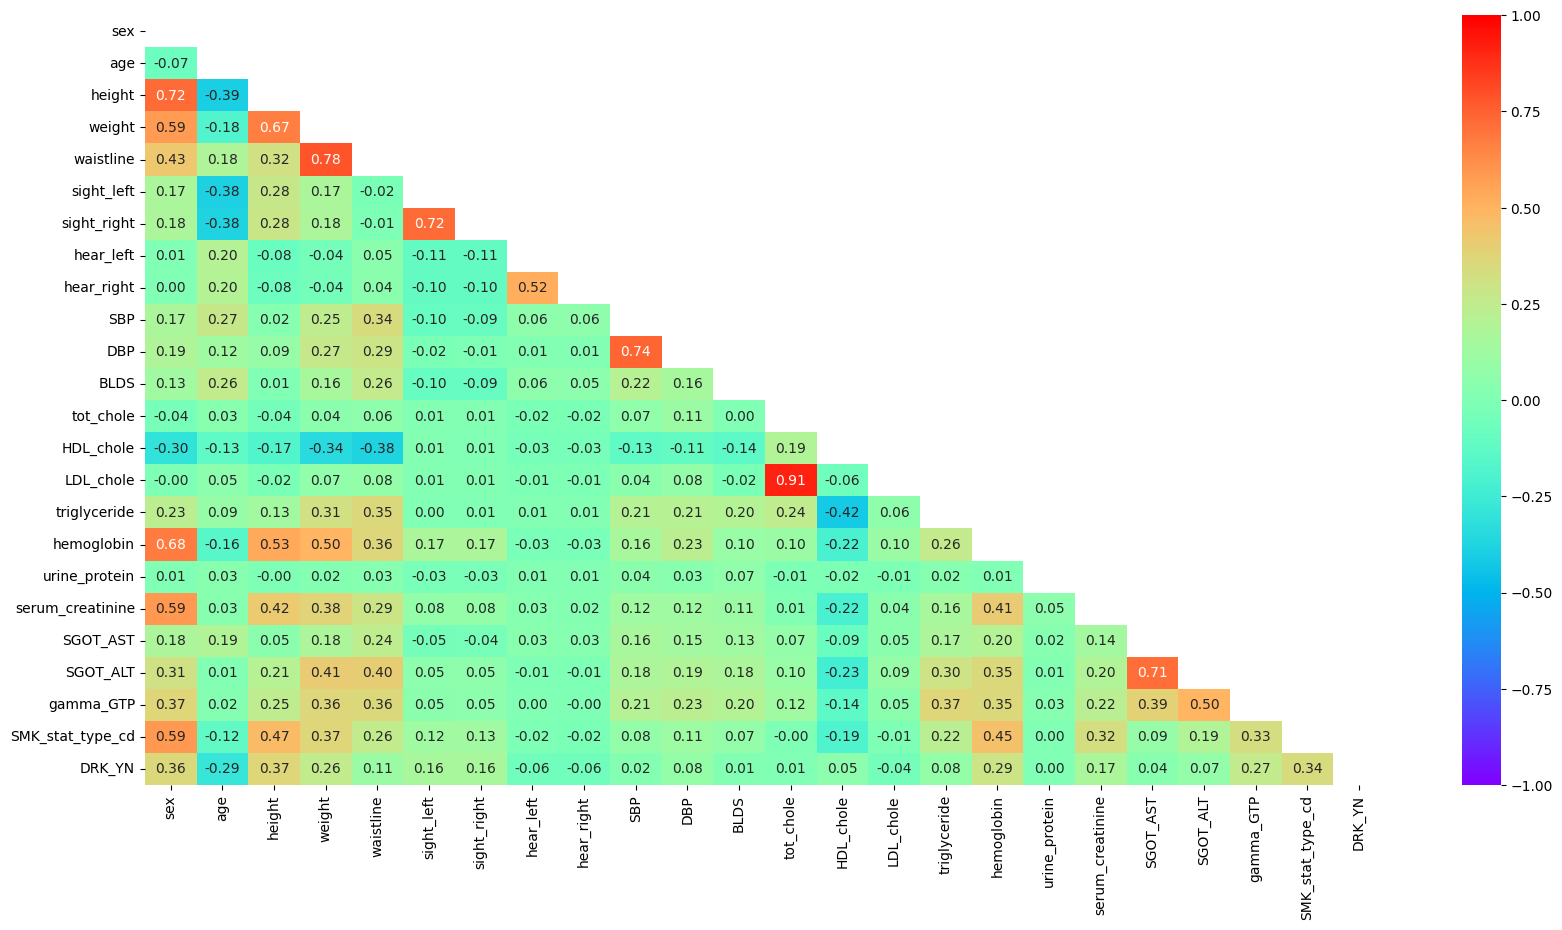

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the size of the heatmap figure
plt.figure(figsize=(20, 10))

# Create a heatmap using seaborn with annotations, color scale, and the specified mask
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", mask=mask, cmap="rainbow")

# Display the heatmap
plt.show()

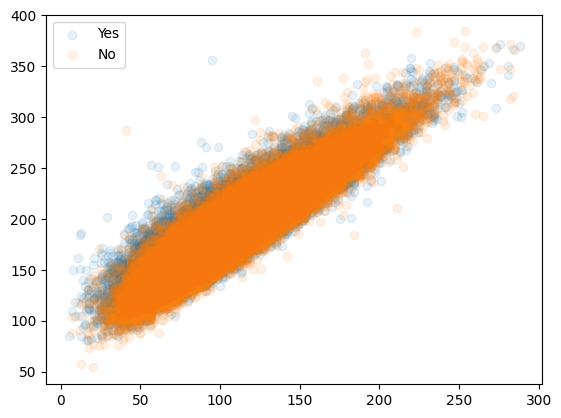

In [ ]:
# Extract subsets based on DRK_YN values
Y = df[df.DRK_YN == 1]
N = df[df.DRK_YN == 0]

# Scatter plot for 'Yes' values
plt.scatter(Y.LDL_chole, Y.tot_chole, label="Yes", alpha=0.1)

# Scatter plot for 'No' values
plt.scatter(N.LDL_chole, N.tot_chole, label="No", alpha=0.1)

# Display legend and show the plot
plt.legend()
plt.show()

## Data Preprocessing

In [ ]:
# Import necessary library
from sklearn.preprocessing import StandardScaler

# Columns to exclude from scaling (may have multiple non-numeric values)
cols_to_exclude = ["DRK_YN"]

# List to store numeric columns
numeric_columns = []

# Iterate over columns and identify numeric ones (excluding specified columns)
for column in df.columns:
    if column not in cols_to_exclude:
        numeric_columns.append(column)

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standardization to the numeric columns in the DataFrame
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Import StandardScaler: Import the StandardScaler class from the sklearn.preprocessing module.
# Columns to Exclude: Specify columns that should be excluded from scaling (e.g., non-numeric or target variable).
# Identify Numeric Columns: Iterate over columns and add those that are not in the exclusion list to the numeric_columns list.
# Create StandardScaler: Create an instance of the StandardScaler class.
# Apply Standardization: Use the fit_transform method to standardize the numeric columns in the DataFrame using the scaler.

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Model Preparation:

# Features (X) and Target variable (y)
X = df.drop(columns="DRK_YN")  # Features (all columns except 'DRK_YN')
y = df.DRK_YN  # Target variable

# Split the data into training and testing sets
# - X_train, X_test: Features for training and testing
# - y_train, y_test: Target variable for training and testing
# - test_size: The proportion of the dataset to include in the test split
# - random_state: Seed for random number generation, ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

# Display the shapes of the features and target variable
print("Shape of Features (X):", X.shape)
print("Shape of Target Variable (y):", y.shape)

# Import train_test_split: Import the train_test_split function from the sklearn.model_selection module.
# Model Preparation:
# Features (X) and Target variable (y): Split the DataFrame into features (all columns except 'DRK_YN') and the target variable.
# Split Data: Use train_test_split to split the data into training and testing sets.
# Display Shapes: Print the shapes of the features and target variable to verify the split.

Shape of Features (X): (114017, 23)
Shape of Target Variable (y): (114017,)


## Logistic Regression

In [ ]:
# Import necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Model:

# Create a Logistic Regression model
LR_model = LogisticRegression()

# Train the model on the training data
LR_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_LR = LR_model.predict(X_test)

# Model Evaluation:

# Evaluate the model on the training data
train_accuracy = LR_model.score(X_train, y_train)
print("Score on the training data:", train_accuracy)

# Evaluate the model on the test data
test_accuracy = LR_model.score(X_test, y_test)
print("Score on the test data:", test_accuracy)

# Calculate accuracy using the accuracy_score function
accuracy = accuracy_score(y_test, y_pred_LR)
print("Model Evaluation Logistic Regression: Accuracy Score:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR))

# save the classifier
with open('LR_model.pkl','wb') as f:
    pickle.dump(LR_model,f)

Score on the training data: 0.7235826550659556
Score on the test data: 0.7215576214699175
Model Evaluation Logistic Regression: Accuracy Score: 0.7215576214699175

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     14581
           1       0.72      0.70      0.71     13924

    accuracy                           0.72     28505
   macro avg       0.72      0.72      0.72     28505
weighted avg       0.72      0.72      0.72     28505



In [ ]:
# load the classifier
with open('LR_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

0.7215576214699175

## Decision Tree Classifier

In [ ]:
# Import necessary library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree Classifier Model:

# Create a Decision Tree Classifier model with a specified maximum depth
model_Tree = DecisionTreeClassifier(max_depth=10)

# Train the Decision Tree model on the training data
model_Tree.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred_T = model_Tree.predict(X_test)

# Model Evaluation:

# Evaluate the Decision Tree model on the training data
train_accuracy_tree = model_Tree.score(X_train, y_train)
print("Score on the training data:", train_accuracy_tree)

# Evaluate the Decision Tree model on the test data
test_accuracy_tree = model_Tree.score(X_test, y_test)
print("Score on the test data:", test_accuracy_tree)

# Calculate accuracy using the accuracy_score function
accuracy_tree = accuracy_score(y_test, y_pred_T)
print("Model Evaluation Decision Tree: Accuracy Score:", accuracy_tree)

print("Classification Report:")
print(classification_report(y_test, y_pred_T))

# save the classifier
with open('DT_model.pkl','wb') as f:
    pickle.dump(model_Tree,f)

Score on the training data: 0.7498362802881466
Score on the test data: 0.711138396772496
Model Evaluation Decision Tree: Accuracy Score: 0.711138396772496
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     14581
           1       0.71      0.69      0.70     13924

    accuracy                           0.71     28505
   macro avg       0.71      0.71      0.71     28505
weighted avg       0.71      0.71      0.71     28505



In [ ]:
# Select Important Columns using Decision Tree Feature Importances:

# Get feature importances from the trained Decision Tree model
feature_importances = model_Tree.feature_importances_.tolist()

# Create a DataFrame to store column names and their corresponding importance rates
df_result = pd.DataFrame()
df_result["Columns"] = X_train.columns
df_result["Important Rate"] = feature_importances

# Sort the DataFrame based on importance rates in descending order
df_result = df_result.sort_values(by="Important Rate", ascending=False)

# Reset the index of the DataFrame for better presentation
df_result = df_result.reset_index(drop=True)

# Display the resulting DataFrame with important columns and their rates
df_result

,Columns,Important Rate
0,sex,0.384091
1,age,0.225022
2,gamma_GTP,0.109720
3,HDL_chole,0.062942
4,SMK_stat_type_cd,0.050549
5,SGOT_ALT,0.031060
6,triglyceride,0.018832
7,LDL_chole,0.017325
8,waistline,0.013061
9,DBP,0.012698


In [ ]:
# load the classifier
with open('DT_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

0.711138396772496

## CatBoost Classifer

In [ ]:
# Import necessary libraries
import numpy as np
from catboost import CatBoostClassifier, Pool, metrics

# Identify categorical features indices
categorical_features_indices = np.where(X.dtypes == object)[0]

# Create CatBoost Pools for training and testing data
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
test_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Create CatBoost Classifier model
model_Cat = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],  # Specify loss (custom loss for accuracy in this case)
    random_seed=3,  # Set a random seed for reproducibility
    logging_level='Silent'  # Set logging level to 'Silent' for no output during training
)

# Model Training
model_Cat.fit(train_pool)

# Make predictions on the test data
y_pred_Cat = model_Cat.predict(test_pool)

# Model Evaluation
accuracy_Cat = accuracy_score(y_test, y_pred_Cat)
print("Model Evaluation CatBoost Classifier: Accuracy Score:", accuracy_Cat)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_Cat))

# save the classifier
with open('Cat_model.pkl','wb') as f:
    pickle.dump(model_Cat,f)

Model Evaluation CatBoost Classifier: Accuracy Score: 0.7316260305209612

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     14581
           1       0.73      0.72      0.72     13924

    accuracy                           0.73     28505
   macro avg       0.73      0.73      0.73     28505
weighted avg       0.73      0.73      0.73     28505



In [ ]:
# load the classifier
with open('Cat_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

0.7316260305209612

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create RandomForestClassifier model
model_RF = RandomForestClassifier(
    random_state=3,  # Set a random seed for reproducibility
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,  # Maximum depth of the trees
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='auto',  # Number of features to consider when looking for the best split
)

# Model Training
model_RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred_RF = model_RF.predict(X_test)

# Model Evaluation
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Model Evaluation RandomForest Classifier: Accuracy Score:", accuracy_RF)

print("Classification Report:")
print(classification_report(y_test, y_pred_RF))

# save the classifier
with open('RF_model.pkl','wb') as f:
    pickle.dump(model_RF,f)

Model Evaluation RandomForest Classifier: Accuracy Score: 0.7251359410629714
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     14581
           1       0.72      0.71      0.72     13924

    accuracy                           0.73     28505
   macro avg       0.73      0.72      0.72     28505
weighted avg       0.73      0.73      0.73     28505



In [ ]:
# load the classifier
with open('RF_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

0.7251359410629714

## LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',  # You can use 'binary_error' or other appropriate metrics
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the LightGBM model
num_round = 1000
model_lgb = lgb.train(params, train_data, num_round, valid_sets=[test_data])

warnings.filterwarnings("ignore")

# Make predictions on the test set
y_pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)
y_pred_lgb_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lgb]

# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb_binary)
print("LightGBM: Accuracy Score:", accuracy_lgb)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_binary))

# save the classifier
with open('LightGBM_model.pkl','wb') as f:
    pickle.dump(model_lgb,f)

LightGBM: Accuracy Score: 0.730678828275741

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74     14581
           1       0.73      0.72      0.72     13924

    accuracy                           0.73     28505
   macro avg       0.73      0.73      0.73     28505
weighted avg       0.73      0.73      0.73     28505



In [ ]:
# load the classifier
with open('LightGBM_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)


y_pred_lgb = clf2.predict(X_test, num_iteration=clf2.best_iteration)
y_pred_lgb_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_lgb]
accuracy2 = accuracy_score(y_test, y_pred_lgb_binary)
accuracy2

0.730678828275741

## Tuning the hyperparameters

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Create a CatBoost Pool for training data
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)

# Define the hyperparameter distributions to search
param_dist = {
    'depth': randint(6, 15),
    'learning_rate': uniform(0.01, 0.2),
    'iterations': randint(100, 500),
    'l2_leaf_reg': uniform(1, 10),
}

# Create a CatBoost Classifier
model_Cat = CatBoostClassifier(random_seed=3, task_type='CPU', logging_level='Silent')

# Instantiate RandomizedSearchCV with the model and parameter distributions
random_search = RandomizedSearchCV(
    model_Cat, param_distributions=param_dist, n_iter=10,
    cv=5, scoring='accuracy', n_jobs=-1, random_state=3
)

# Fit the random search to the data
random_search.fit(X_train, y_train, cat_features=categorical_features_indices)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

KeyboardInterrupt: ignored

In [ ]:
%%time
# Fit the CatBoost model with training data and evaluate on the test set
model_Cat.fit(train_pool, eval_set=test_pool, plot=True)

In [ ]:
# Print the classification report for the CatBoost model on the test set
y_pred_Cat = model_Cat.predict(X_test)
print(classification_report(y_pred_Cat, y_test))

In [ ]:
# Get and print the feature importance from the CatBoost model
feature_importance = model_Cat.get_feature_importance(prettified=True)
feature_importance

In [ ]:
# Import necessary libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the confusion matrix for the CatBoost model
conf_mat = confusion_matrix(y_test, y_pred_Cat)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Smoking Prediction

In [ ]:
import pandas as pd
new_data = pd.read_csv("./smoking_driking_dataset_Ver01.csv")
new_data = new_data.head(10000)

## RandomForest Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading preprocessed data

# Separate features (X) and target variable (y)
X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
RF_2model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the model
RF_2model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = RF_2model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# save the classifier
with open('RF2_model.pkl','wb') as f:
    pickle.dump(RF_2model,f)

Accuracy: 0.6855
Classification Report:
              precision    recall  f1-score   support

         1.0       0.81      0.84      0.82      1192
         2.0       0.43      0.32      0.37       344
         3.0       0.51      0.56      0.54       464

    accuracy                           0.69      2000
   macro avg       0.58      0.57      0.58      2000
weighted avg       0.68      0.69      0.68      2000



In [ ]:
# load the classifier
with open('RF2_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

## XGBoost Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Loading preprocessed data

# Separate features (X) and target variable (y)
X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Use LabelEncoder to convert class labels to start from 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Classifier XGB2_model
XGB2_model = XGBClassifier(random_state=42)  # You can adjust hyperparameters

# Train the XGB2_model
XGB2_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = XGB2_model.predict(X_test)

# Evaluate the XGB2_model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# save the classifier
with open('XGB2_model.pkl','wb') as f:
    pickle.dump(XGB2_model,f)

In [ ]:
# load the classifier
with open('XGB2_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

## SupportVector Classifier

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features (X) and target variable (y)
X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM Classifier model
svm_model = SVC(random_state=42)  # You can adjust hyperparameters

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_svm)

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# save the classifier
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm_model,f)

In [ ]:
# load the classifier
with open('svm_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

## AdaBoost Classifier

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Classifier model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust hyperparameters

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model performance
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_adaboost)
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

# save the classifier
with open('adaboost_model.pkl','wb') as f:
    pickle.dump(adaboost_model,f)

AdaBoost Classifier:
Accuracy: 0.697
Classification Report:
              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83      1192
         2.0       0.43      0.35      0.39       344
         3.0       0.54      0.62      0.57       464

    accuracy                           0.70      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.69      0.70      0.69      2000



In [ ]:
# load the classifier
with open('adaboost_model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

y_pred_temp = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred_temp)
accuracy2

## Tuning the hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define hyperparameters for tuning
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1),
    'random_state': [42]
}

# Create AdaBoost Classifier
adaboost_model = AdaBoostClassifier(base_estimator=None)  # Assuming you want to keep the base_estimator as None

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=adaboost_model, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for predictions
best_adaboost_model_random = random_search.best_estimator_
y_pred_best_adaboost_random = best_adaboost_model_random.predict(X_test)

# Evaluate the best model's performance
accuracy_best_adaboost_random = accuracy_score(y_test, y_pred_best_adaboost_random)
print("Best AdaBoost Classifier (RandomizedSearchCV):")
print("Accuracy:", accuracy_best_adaboost_random)
print("Classification Report:")
print(classification_report(y_test, y_pred_best_adaboost_random))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred_adaboost)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature importance

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming your data is stored in a DataFrame called 'df'
# Separate features (X) and target variable (y)
X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost Classifier model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust hyperparameters

# Train the model
adaboost_model.fit(X_train, y_train)

# Get feature importances
feature_importances = adaboost_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame
feature_importance_df

In [ ]:
import pickle

# Save the model to a file using pickle
with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(adaboost_model, file)

# Load the model back using pickle
with open('adaboost_model.pkl', 'rb') as file:
    loaded_adaboost_model = pickle.load(file)

In [ ]:
# Save the LightGBM model to a file
model_lgb.save_model('lightgbm_model.txt')

# Load the LightGBM model back
loaded_model_lgb = lgb.Booster(model_file='lightgbm_model.txt')



In [ ]:
test_row = X_test.iloc[10]
print(test_row)

age                  25.0
height              170.0
weight               85.0
waistline           100.0
sight_left            1.0
sight_right           0.8
hear_left             1.0
hear_right            1.0
SBP                 120.0
DBP                  90.0
BLDS                107.0
tot_chole           208.0
HDL_chole            61.0
LDL_chole           125.0
triglyceride        108.0
hemoglobin           15.9
urine_protein         1.0
serum_creatinine      1.1
SGOT_AST             23.0
SGOT_ALT             36.0
gamma_GTP            47.0
sex_Male              1.0
DRK_YN_Y              1.0
Name: 2750, dtype: float64


In [ ]:
#For Drinking
with open('LightGBM_model.pkl', 'rb') as f:
    Drinkers_model = pickle.load(f)

output_pred = Drinkers_model.predict(test_row, num_iteration=Drinkers_model.best_iteration)
output_pred_binary = [1 if pred >= 0.5 else 0 for pred in output_pred]
print(output_pred_binary, test_row['DRK_YN_Y'])

[1] 1.0


In [ ]:
#For smoking

X = new_data.drop("SMK_stat_type_cd", axis=1)  # Adjust column names accordingly
y = new_data["SMK_stat_type_cd"]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

test_row = X.iloc[10]
with open('adaboost_model.pkl', 'rb') as f:
    Smokers_model = pickle.load(f)

output_pred2 = Smokers_model.predict(test_row)
print(output_pred2)

ValueError: ignored